# Participate in a Smart City Contest



![Trees of Paris](https://c.wallhere.com/photos/46/ed/paris_eiffel_tower_france_river_beach_trees-1062691.jpg!d)

### Deliverables 

> * A Jupyter Notebook documenting your exploration of the 
> * A slide presentation (PowerPoint format) for your oral presentation

### Structure
> 1. Overview of the dataset  
> 2. Method used to analyze the data  
> 3. Summary of data analysis  




#**1 - Overview of the Dataset**


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

> We've defined **arvores** as the name of our DataFrame

> By the way arvores means Trees in portuguese :-)








In [4]:
arvores = pd.read_csv("p2-arbres-en.csv",sep=";")

## Showing information regarding the dataframe
> Quantity of entires: 200.137  
> Quantity of columns: 18  
> Quantity of columns with missing values: 9  


In [5]:
arvores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200137 non-null  int64  
 1   location_type       200137 non-null  object 
 2   domain              200136 non-null  object 
 3   arrondissement      200137 non-null  object 
 4   additional_address  30902 non-null   object 
 5   street_number       0 non-null       float64
 6   street_location     200137 non-null  object 
 7   id_location         200137 non-null  object 
 8   tree_name           198640 non-null  object 
 9   tree_type           200121 non-null  object 
 10  tree_specie         198385 non-null  object 
 11  variety             36777 non-null   object 
 12  circumference_cm    200137 non-null  int64  
 13  height_m            200137 non-null  int64  
 14  development_stage   132932 non-null  object 
 15  outstanding         137039 non-nul

## Describing the dataframe
> Here we can see the statistics regarding the data.   

> For example the minimum, mean and maximum values in each column. It's important and allow us to identify some strange values like **_height_m_ _max_ _value_** with _*200.881.818*_ *meters*, when the mean for this column is 13.11 meters. This value probably were generated by outliers or wrong data filled in the dataset.


In [6]:
arvores.describe() # include="all"

,id,street_number,circumference_cm,height_m,outstanding,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


## Seeing dataframe content
> First 4 entries

In [7]:
arvores.head(4)

,id,location_type,domain,arrondissement,additional_address,street_number,street_location,id_location,tree_name,tree_type,tree_specie,variety,circumference_cm,height_m,development_stage,outstanding,geo_point_2d_a,geo_point_2d_b
0,99874,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Tree,Garden,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006


# **2 - Method used to analyze the data**

## Grouping
> Here we are using the groupby function to agregate and count by some criteria.

> 1. First we select a column to groupby (**tree_specie**). We have created a new dataframe called **dfGrouped** with this column.

> 2. Then we agregate the data using the groupby function counting each row per tree_specie, sorting by quantity and limiting the 10 first rows of the function result. 

> 3. After all we have a list of the **10 most popular trees in Paris**.


In [8]:
dfGrouped = arvores[["tree_specie"]]

dfGrouped = dfGrouped.groupby(["tree_specie"])["tree_specie"] \
                             .count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(10)

dfGrouped

,tree_specie,count
506,x hispanica,36409
185,hippocastanum,20039
207,japonica,11822
277,n. sp.,9063
431,tomentosa,8962
349,pseudoplatanus,7431
334,platanoides,6286
280,nigra,4947
499,x europaea,4707
491,x carnea,4417


Species Quantity analysis

In [9]:
dfGroupedSpecies = arvores[["tree_specie"]]
dfGroupedSpecies = dfGroupedSpecies.groupby(["tree_specie"])["tree_specie"] \
                             .count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

dfGroupedSpecies.count()

tree_specie    539
count          539
dtype: int64

## Ploting the result with graphs
> We've decided to use Seaborn


Text(0.5, 1.0, 'Top 10 tree species of Paris')

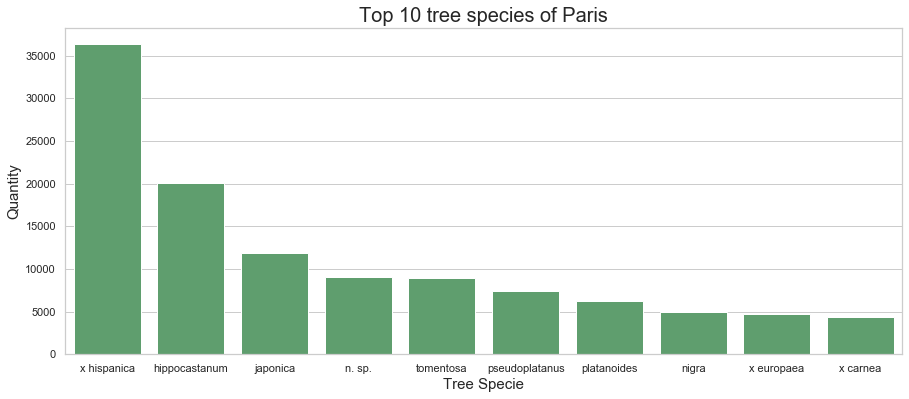

In [10]:

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="tree_specie", y="count", data=dfGrouped, label="Total", color="g")
ax.set_ylabel("Quantity", fontsize=15)
ax.set_xlabel("Tree Specie", fontsize=15)
ax.set_title("Top 10 tree species of Paris" ,fontsize=20)


Text(0.5, 1.0, 'Top 10 trees of Paris by name')

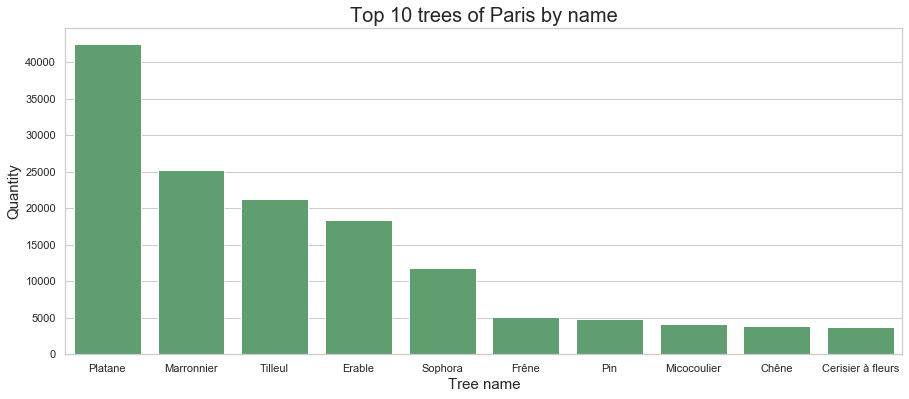

In [11]:
dfGroupedbyName = arvores[["tree_name"]]

dfGroupedbyName = dfGroupedbyName.groupby(["tree_name"])["tree_name"] \
                             .count()\
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(10)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="tree_name", y="count", data=dfGroupedbyName, label="Total", color="g")
ax.set_ylabel("Quantity", fontsize=15)
ax.set_xlabel("Tree name", fontsize=15)
ax.set_title("Top 10 trees of Paris by name" ,fontsize=20)

In [12]:
arvores.describe()

# outliers for circumference and height


,id,street_number,circumference_cm,height_m,outstanding,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


## Importing libs

In [13]:
!pip install geopandas
!pip install descartes



In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Using Geopandas & Shapely

> To use Geopandas we had to create a new column with the coordenates 
(longitude and latitude) in a way tha geopandas dataframe accept.  
> We used Shapely geometric library to fill this new column with the coordinates.


In [15]:
geoinfo = arvores[['geo_point_2d_a','geo_point_2d_b']]

#renomeando as colunas para facilitar a manipulação
geoinfo = geoinfo.rename(columns={"geo_point_2d_a": "Lat", "geo_point_2d_b": "Long"})
#elimina valores nulos
geoinfo = geoinfo.dropna()

from shapely.geometry import Point

geoinfo['Coordenadas'] = [Point(long, lat) for long, lat in 
                           zip(geoinfo['Long'], geoinfo['Lat'])]
geoinfo

,Lat,Long,Coordenadas
0,48.857620,2.320962,POINT (2.32096210986 48.8576199541)
1,48.857656,2.321031,POINT (2.3210314229 48.85765606970001)
2,48.857705,2.321061,POINT (2.32106056595 48.8577050069)
3,48.857722,2.321006,POINT (2.32100582532 48.8577220449)
4,48.890435,2.315289,POINT (2.31528945877 48.8904352883)
...,...,...,...
200132,48.821957,2.456264,POINT (2.45626366522 48.8219566889)
200133,48.823254,2.457935,POINT (2.45793450089 48.8232535747)
200134,48.822907,2.457970,POINT (2.45797006964 48.8229071371)
200135,48.822522,2.455956,POINT (2.45595554617 48.8225223402)


## Ploting Geopoints with Geopandas
> Once we have the coordinates we can create the GeoDataFrame.  
> After create the GeoDataframe is easy to plot the data

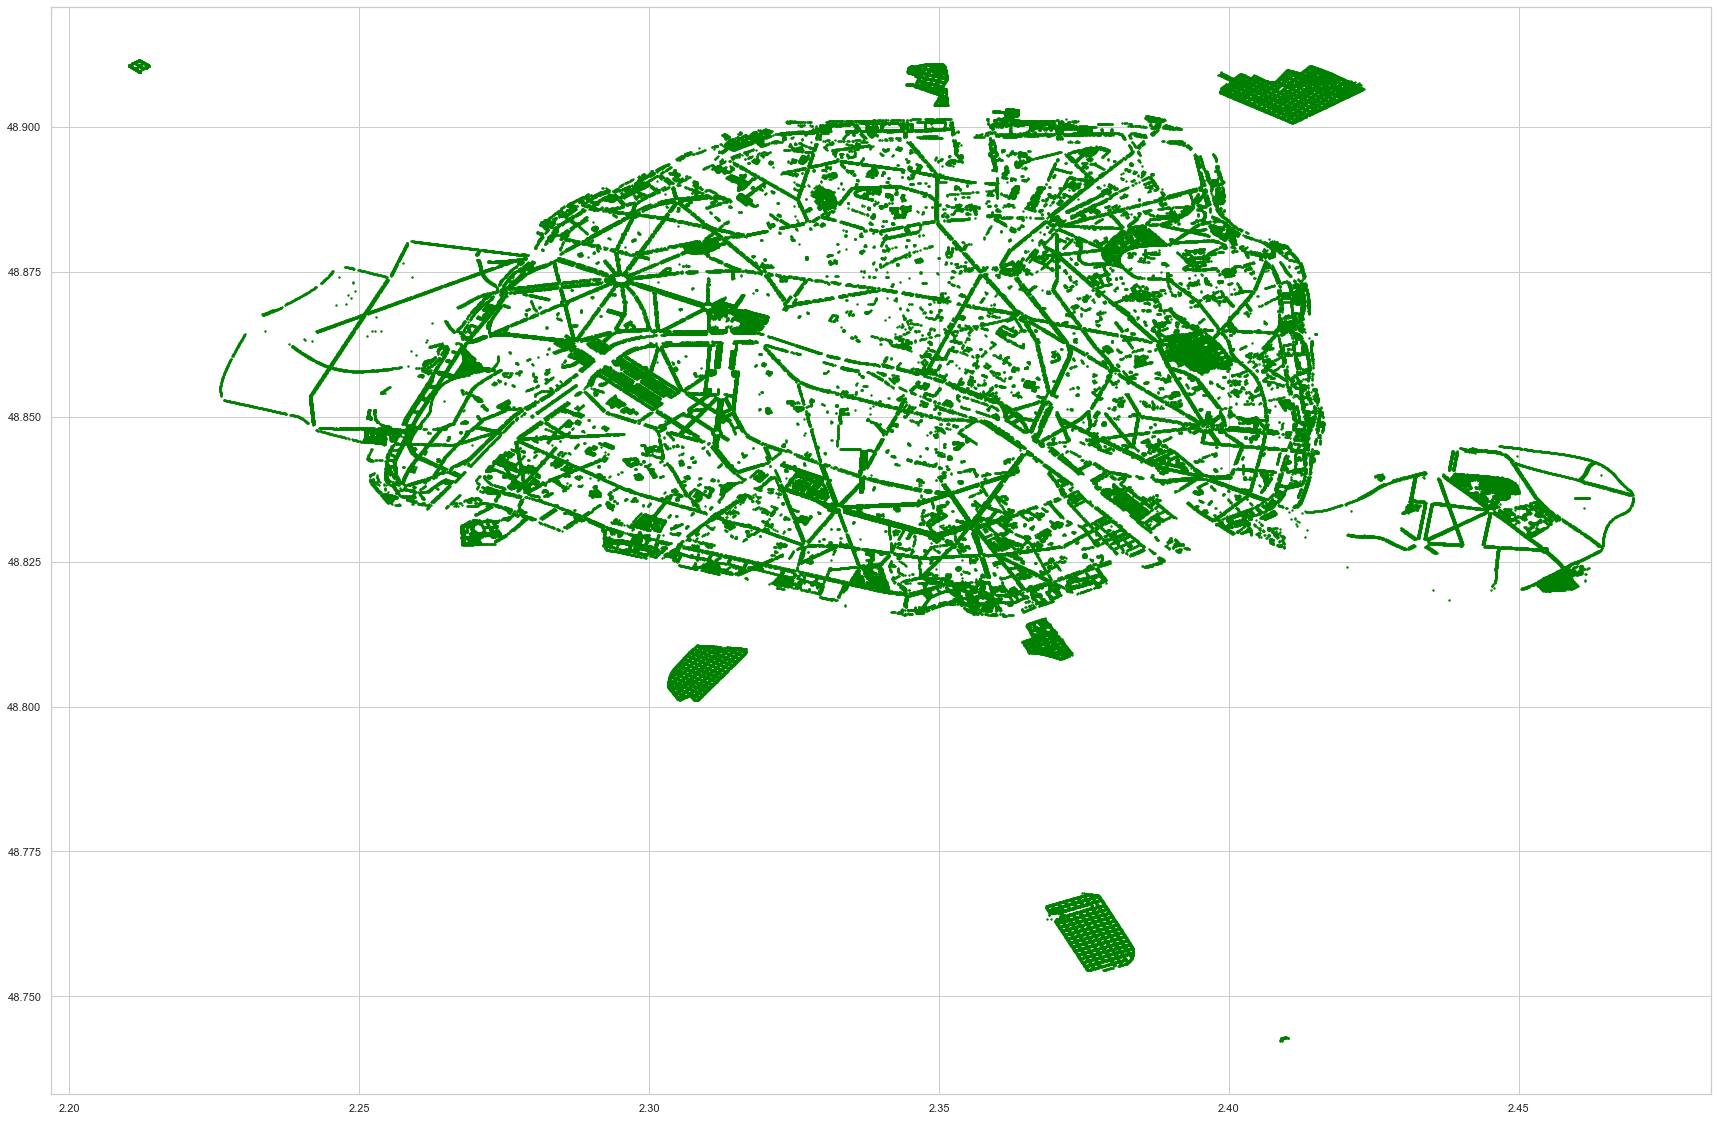

In [16]:
# Convert the DataFrame into a GeoDataFrame
geodata = gpd.GeoDataFrame(geoinfo, geometry='Coordenadas') 
geodata.plot(figsize=(30, 20), color="green", markersize= 2)

## Enhancing the graph
> To make the graph more understandible and rich, we added the boundaries of Paris (gray color) and the hydrography map (blue color)

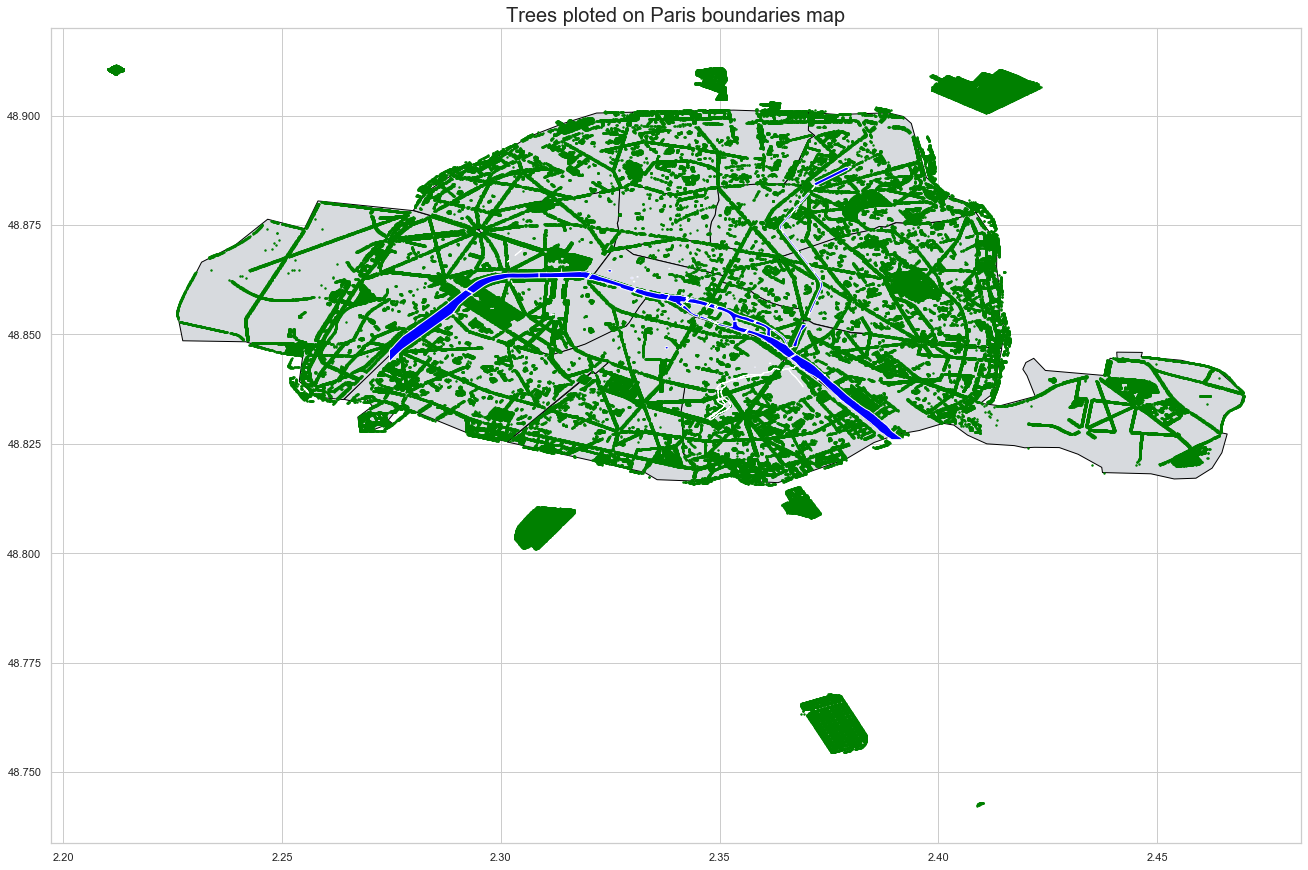

In [17]:
# Creating a geopandas Dataframe with Paris boundaries
paris = gpd.read_file("paris.geojson.json")

ax.set_aspect('equal')

# Ploting paris boundaries
ax = paris.plot(
    color='#d7dade', edgecolor='black', figsize=(30, 15))
ax.set_title("Trees ploted on Paris boundaries map", fontsize=20)

geodata.plot(ax=ax, color='green', markersize= 2)

# adding some water
parisWater = gpd.read_file("parisWater.json")
parisWater.plot(ax=ax, color='blue', markersize= 2)

plt.show()

## Boxplot and Removing outliers


> We have removed the entries where the circumference_cm values are more than **3600**.  
> We have searched that the biggest tree in the world has 36 meters of circumference.

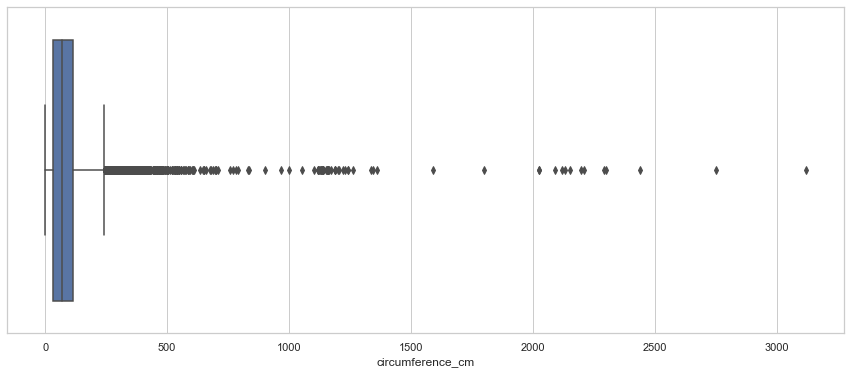

In [18]:
plt.figure(figsize=(15, 6)) 

groupBox = arvores[arvores['circumference_cm'] <= 3600]
groupBox.describe()
sns.boxplot(groupBox['circumference_cm'])

## Scatterplot and Removing outliers
> Here is hard to identify the groups, but we can see the itensity of points around the circunferences (0-500cm) and height (0-30mt)  
> Let's put some color here!


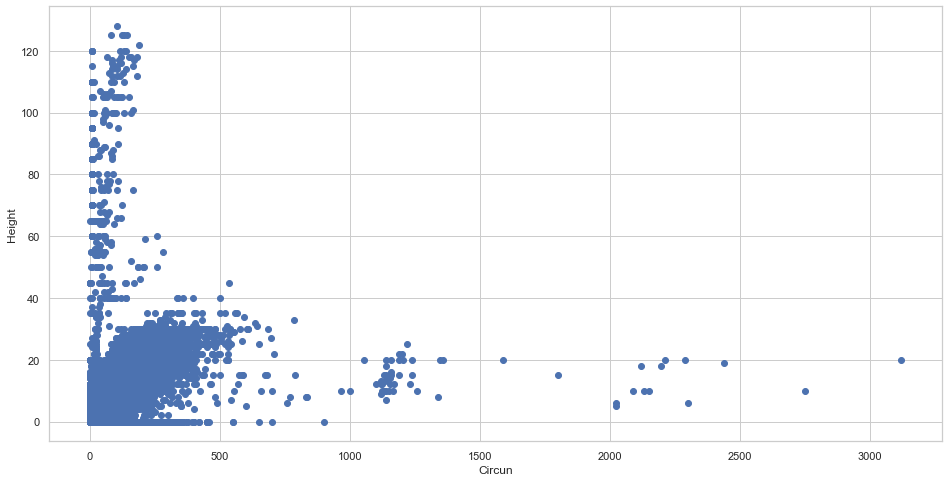

In [19]:
#groupDisp = arvores

groupDisp = arvores[arvores['circumference_cm'] <= 3600]
groupDisp = groupDisp[groupDisp['height_m'] <= 128]
##groupDisp = groupDisp[groupDisp['tree_name'] == 'Platane']

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(groupDisp['circumference_cm'], groupDisp['height_m'])
ax.set_xlabel('Circun')
ax.set_ylabel('Height')
plt.show()

## Scatterplot
> Basically is the same graph above, but we've added color using the hue option to identify the trees for each point ploted  
> With this graph we can see the similarities beetween the top 10 trees and the outliers.

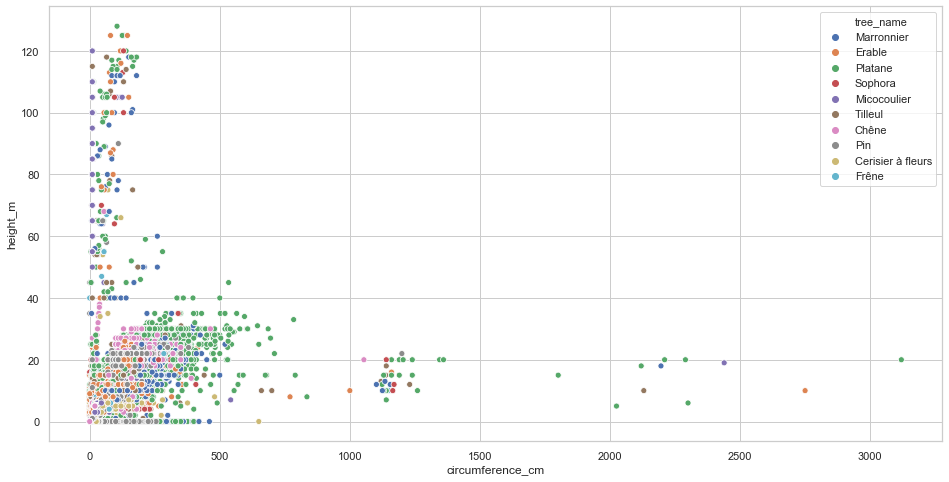

In [20]:
groupDisp = groupDisp[groupDisp['tree_name'].isin(dfGroupedbyName['tree_name'])] #.isin([3, 6]
plt.subplots(figsize=(16,8))
sns.scatterplot(x='circumference_cm', y='height_m', hue='tree_name', data=groupDisp)

# **3 - Summary of the Data Analysis**

## We have discovered that 

*   Platane is the most popular tree in Paris **(+40k)**.
*   There are a lot of tree species in this city, **539** to be precise,
*   The concentration of height and Circunferences:
 > For height between **1m and 40m**  
 > For circumference between **1cm and 500cm**
* The Dataset has wrong values like a tree with **250.255cm** of circumference and another with **881.818** meter of height.
* With the geographic map we can assume that Paris is a Wooded City, there are a lot of areas covered by trees, even though the city of Paris exists more than 3 thousand years.